# **1. Install pycaret**

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 104.1 MB/s eta 0

# **2. Check the pycaret version**

In [4]:
import pycaret
print(pycaret.__version__)

3.0.4


# **3. Get the dataset from github**

In [5]:
import pandas as pd
dataset_url = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/Lecture2_Assignments/Assignment1/complaints_processed_multiclass.csv'
dataset = pd.read_csv(dataset_url)

# **4. Scan the dataset**

In [6]:
print("(Rows, Columns) in the dataset : ", dataset.shape, "\n\n")
dataset.head()

(Rows, Columns) in the dataset :  (162421, 3) 




,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [29]:
dataset.rename(columns={'Unnamed: 0': 'complaint_number', 'product': 'complaint_type'}, inplace=True)
dataset.head()

,complaint_number,complaint_type,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


# **5. Divide the data**

In [30]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
data = data.reset_index(drop=True)

print("Data for modeling : ", data.shape)
print("Unseen data for predictions : ", data_unseen.shape)

Data for modeling :  (154300, 3)
Unseen data for predictions :  (8121, 3)


In [31]:
data.head()

,complaint_number,complaint_type,narrative
0,62793,credit_reporting,two unverified account already file complaint ...
1,23354,credit_reporting,issue getting credit report sent information r...
2,75275,mortgages_and_loans,see multiple day late mark clear violation rig...
3,118683,retail_banking,paypal refusing service based race ethnicity o...
4,140884,debt_collection,matter started back received letter ncb see at...


In [32]:
data_unseen.head()

,complaint_number,complaint_type,narrative
0,57,credit_reporting,credit pulled lender preparation buying home u...
1,72,credit_reporting,old debt credit file requested three credit bu...
2,97,credit_reporting,thank submitting complaint cfpb complaint port...
3,150,credit_reporting,true identity theft victim identity theft info...
4,158,credit_reporting,true identity theft im member data breach file...


In [33]:
unique_values = data['complaint_type'].unique()
print(unique_values)


['credit_reporting' 'mortgages_and_loans' 'retail_banking'
 'debt_collection' 'credit_card']


In [34]:
percentage = data['complaint_type'].value_counts(normalize=True)*100
print(percentage)


credit_reporting       56.125081
debt_collection        14.254699
mortgages_and_loans    11.664938
credit_card             9.609203
retail_banking          8.346079
Name: complaint_type, dtype: float64


# **6. Setup**

In [35]:
from pycaret.classification import *

exp_product_data = setup(data = data, target = 'complaint_type', session_id=333, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,333
1,Target,complaint_type
2,Target type,Multiclass
3,Target mapping,"credit_card: 0, credit_reporting: 1, debt_collection: 2, mortgages_and_loans: 3, retail_banking: 4"
4,Original data shape,"(154300, 3)"
5,Transformed data shape,"(154300, 3)"
6,Transformed train set shape,"(108010, 3)"
7,Transformed test set shape,"(46290, 3)"
8,Numeric features,1
9,Categorical features,1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

#**7. Compare all the Models**

In [40]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6319,0.8034,0.6319,0.6081,0.6133,0.3807,0.3855,6.4710
qda,Quadratic Discriminant Analysis,0.5693,0.6690,0.5693,0.4863,0.4228,0.0312,0.1065,4.3280
ridge,Ridge Classifier,0.5617,0.0000,0.5617,0.3449,0.4064,0.0077,0.0384,3.7440
lr,Logistic Regression,0.5613,0.5012,0.5613,0.3150,0.4035,0.0000,0.0000,6.0850
nb,Naive Bayes,0.5613,0.5709,0.5613,0.3150,0.4035,0.0000,0.0000,4.2870
dummy,Dummy Classifier,0.5613,0.5000,0.5613,0.3150,0.4035,0.0000,0.0000,4.3710
lda,Linear Discriminant Analysis,0.5171,0.6058,0.5171,0.4657,0.3980,-0.0277,-0.0457,4.3760
gbc,Gradient Boosting Classifier,0.4830,0.6977,0.4830,0.6320,0.4307,0.1383,0.1617,6.7530
xgboost,Extreme Gradient Boosting,0.4813,0.7024,0.4813,0.5184,0.4477,0.1497,0.1581,4.4090
lightgbm,Light Gradient Boosting Machine,0.4660,0.7007,0.4660,0.5327,0.4343,0.1489,0.1630,4.5520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [41]:
print(best_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


# **8. Analyze Model**
Choosing **K Neighbors Classifier** model - **knn**

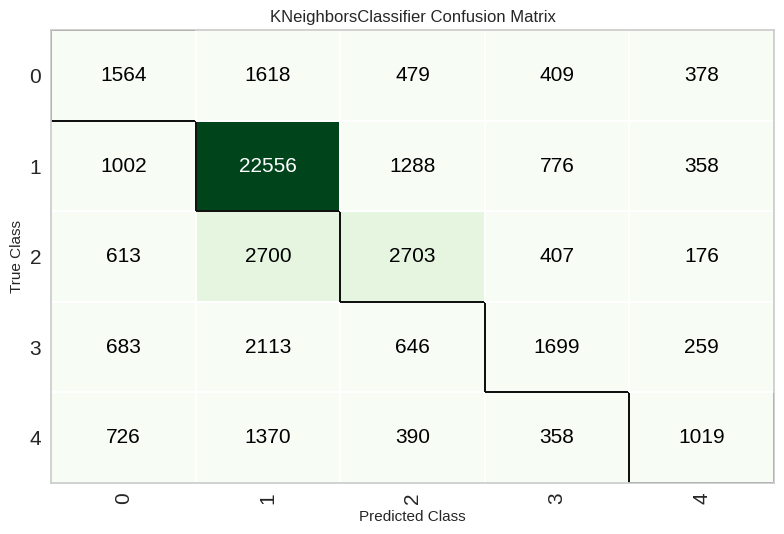

In [42]:
plot_model(best_model, plot = 'confusion_matrix')

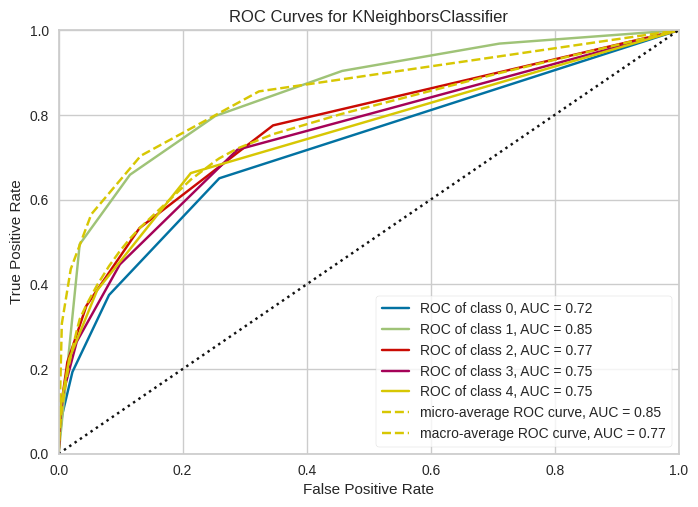

In [44]:
plot_model(best_model, plot = 'auc')


# **9. Prediction**

In [45]:
complaint_type_prediction = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6382,0.8072,0.6382,0.6129,0.6182,0.3891,0.3946


In [46]:
complaint_type_prediction.head()

,complaint_number,narrative,complaint_type,prediction_label,prediction_score
36226,16822,coronavirus crisis many mortgage company waivi...,3,credit_reporting,0.6
1400,58206,provided information experian multiple time pr...,1,credit_reporting,0.8
19664,73897,recently sent letter day ago bureau equifax di...,1,credit_reporting,1.0
46821,123454,see attatched fraud claim letter allegeding te...,0,credit_card,0.6
121741,30719,extremely frustrated company investigating acc...,1,credit_reporting,0.6


# **10. Predict on Unseen data**

In [48]:
unseen_predictions = predict_model(best_model, data=data_unseen)
unseen_predictions.head(50)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6307,0.7974,0.6307,0.6081,0.6113,0.3739,0.3794


,complaint_number,narrative,complaint_type,prediction_label,prediction_score
0,57,credit pulled lender preparation buying home u...,1,credit_card,0.6
1,72,old debt credit file requested three credit bu...,1,credit_reporting,0.6
2,97,thank submitting complaint cfpb complaint port...,1,debt_collection,0.6
3,150,true identity theft victim identity theft info...,1,credit_reporting,1.0
4,158,true identity theft im member data breach file...,1,credit_reporting,1.0
5,162,true identity theft report number report numbe...,1,credit_reporting,0.8
6,178,block except otherwise provided section consum...,1,credit_reporting,1.0
7,210,block except otherwise provided section consum...,1,credit_reporting,1.0
8,232,block except otherwise provided section consum...,1,credit_reporting,1.0
9,267,block except otherwise provided section consum...,1,credit_reporting,1.0


# **11. Saving the model**

In [49]:
save_model(best_model,'Complaint_type_model_V1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['complaint_number'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_val...
                                     transformer=TargetEncoder(cols=['narrative'],
                                                               drop_invariant=False,
                                                               ha

# **12. Load the saved model (for future use)**

In [52]:
loaded_complaint_type_model = load_model('Complaint_type_model_V1')
loaded_complaint_type_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['complaint_number'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_val...
                                    transformer=TargetEncoder(cols=['narrative'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)